NOTE: this notebook is meant to be run sequentially only

# Tinkering with HOMUS

In [1]:
# In this section we import the dataset and explore the datapoints
# to better understand the structure of the dataset
!git clone https://github.com/apacha/Homus.git

Cloning into 'Homus'...
remote: Enumerating objects: 15345, done.
remote: Total 15345 (delta 0), reused 0 (delta 0), pack-reused 15345
Receiving objects: 100% (15345/15345), 3.15 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (34/34), done.


label: 12-8-Time


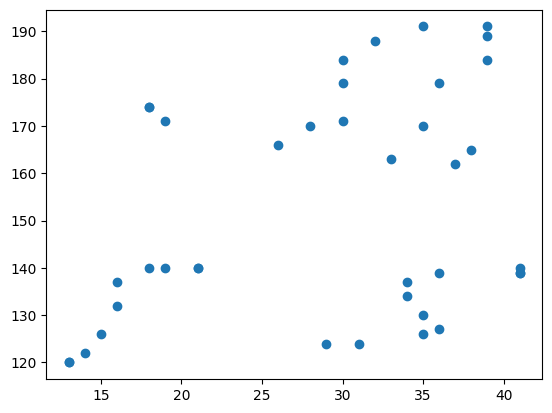

In [2]:
import numpy as np
from itertools import chain
from PIL import Image
import os
import matplotlib.pyplot as plt

root_dir = '/content'
text_files = []
# Walk through the directory tree starting from the root directory
for dirpath, dirnames, filenames in os.walk(root_dir):
    # Check if the current directory contains text files
    n = [os.path.join(dirpath,file) for file in filenames if file.endswith('.txt')]
    for nn in n:
        text_files.append(nn)

with open('/content/Homus/HOMUS/1/1-1.txt', 'r') as file:
    # Read the contents of the text file
    contents = file.read()
    A = contents.split('\n')
    label, rest = A[0], A[1:]
    #print(label)
    #print(rest)
    coords = []
    for i in rest:
        coords.append(i.split(';'))
    coords = list(chain(*coords))
    #print(len(outs))
    #x = [1,2,3,2,2,2,3,4]
    coords = list(filter(lambda a: a != '', coords))
    # print(coords)
    outs = np.zeros((len(coords), 2))
    for i in range(len(coords)):
        x, y = coords[i].split(',')
        outs[i,0] = x
        outs[i,1] = y
    #print(outs)
print(f'label: {label}')
plt.plot(outs[:,0], outs[:,1], 'o')
plt.show()

#a = load()
#a = Image('content/Homus/1/1-1.txt')

Since the HOMUS dataset tinkering above shows they are text files, we need tools to convert them to images for classification tasks

# Using omrdatasettools to Generate Images from HOMUSV2

In [3]:
# This section uses the omrdatasettools
# credits here: https://omr-datasets.readthedocs.io/en/latest/
!pip install omrdatasettools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for omrdatasettools: filename=omrdatasettools-1.4.0-py3-none-any.whl size=35299 sha256=2fe35698aa46eac949a703b6fd1b7b2d7e8f0e277ed3de02c2b06b420a4070fa
  Stored in directory: /root/.cache/pip/wheels/47/9d/df/b7fa44e500e4a0536a5fb085de11f9f617bab81dd2e4028a78
  Created wheel for mung: filename=mung-1.2-py3-none-any.whl size=124894 sha256=6e4864ea8849f204cd9aff6222e8e81f2a86e8bff990a33e3a0d4f8a507400bc
  Stored in directory: /root/.cache/pip/wheels/4f/7a/1a/16150e05ffbd9c4e05fc00e47dbfba27740a1f4b6899429d56
  Created wheel for muscima: filename=muscima-0.10.0-py3-none-any.whl size=116523 sha256=c9bd5f389835701b

In [4]:
from omrdatasettools import Downloader, OmrDataset
# Load the complete HOMUS V2 dataset
downloader = Downloader()
downloader.download_and_extract_dataset(OmrDataset.Homus_V2, "Homus_V2")

Downloading: https://github.com/apacha/OMR-Datasets/releases/download/datasets/HOMUS-2.0.zip Bytes: 5001630 into HOMUS-2.0.zip



Extracting HOMUS-2.0.zip dataset...


In [5]:
from omrdatasettools import HomusImageGenerator
# The dataset is converted to images in the code below
# We can change how many images are generated per text file
# by including a list as the staff line vertical offsets.
# these are essentially data augmentations but will be set to 0 for this task
HomusImageGenerator.create_images(raw_data_directory="Homus_V2",
                                  destination_directory="Homus_V2_imgs",
                                  stroke_thicknesses=[3],
                                  canvas_width=96,
                                  canvas_height=96,
                                  staff_line_spacing=14,
                                  staff_line_vertical_offsets=None,
                                  random_position_on_canvas = False)

Generating 15200 images with 15200 symbols in 1 different stroke thicknesses ([3])
Randomly drawn on a fixed canvas of size 96x96 (Width x Height)
In directory /content/Homus_V2_imgs


100%|██████████| 15200/15200 [00:18<00:00, 835.97it/s]


{'2-4-Time/89-38_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d8100>,
 'Sixty-Four-Note/89-138_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f614a6ad7e0>,
 'C-Clef/89-3_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d82b0>,
 'Barline/89-149_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493dab60>,
 'Half-Note/89-83_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d83d0>,
 'Flat/89-56_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493dad40>,
 '12-8-Time/89-34_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d8460>,
 'Whole-Note/89-70_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493dada0>,
 'C-Clef/89-4_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d8400>,
 'G-Clef/89-12_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493dae00>,
 'Sixty-Four-Note/89-140_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493d8550>,
 '3-8-Time/89-49_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f61493daf50>,
 'Half-N

In [6]:
# We create a custom dataset class to deal with the images and labels
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import cv2
import os

torch.manual_seed(23)
np.random.seed(23)
class HomusDataset(Dataset):
    def __init__(self, root_dir=None, paths=None, targets=None):
        #initialize it with optional arguments: either root dir or data.
        if root_dir:
            targets = []
            paths = []
            for dirpath, dirnames, filenames in os.walk(root_dir):
                if filenames != []:
                    target = dirpath.split('/')[-1]
                    for file in filenames:
                        paths.append(os.path.join(dirpath,file))
                        targets.append(target)
            self.paths = paths
            self.targets = targets
            #self.targets = torch.tensor(targets, dtype=torch.long)
            return
        if paths and targets:
            self.paths = paths
            self.targets = targets
            return

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        return self.paths[idx], self.targets[idx]

    def homus_collate_fn(self, batch):
        images = []
        targets = []
        for path, target in batch:
            image = cv2.imread(path)/255.0
            image = np.transpose(image, (2, 0, 1))
            images.append(image)
            targets.append(target)
        images = torch.tensor(np.array(images), dtype=torch.float32)
        targets = torch.tensor(np.array(targets), dtype=torch.long)
        return images, targets

10640
2280
2280
{'3-8-Time': 0, 'Barline': 1, '2-2-Time': 2, 'Whole-Note': 3, 'F-Clef': 4, 'C-Clef': 5, '6-8-Time': 6, '9-8-Time': 7, '2-4-Time': 8, 'Thirty-Two-Note': 9, 'Sixty-Four-Rest': 10, 'G-Clef': 11, 'Flat': 12, 'Dot': 13, 'Eighth-Note': 14, '12-8-Time': 15, '4-4-Time': 16, 'Whole-Half-Rest': 17, 'Sixteenth-Note': 18, 'Quarter-Note': 19, 'Half-Note': 20, 'Cut-Time': 21, 'Quarter-Rest': 22, 'Sixty-Four-Note': 23, '3-4-Time': 24, 'Natural': 25, 'Sixteenth-Rest': 26, 'Thirty-Two-Rest': 27, 'Common-Time': 28, 'Sharp': 29, 'Double-Sharp': 30, 'Eighth-Rest': 31}
{0: '3-8-Time', 1: 'Barline', 2: '2-2-Time', 3: 'Whole-Note', 4: 'F-Clef', 5: 'C-Clef', 6: '6-8-Time', 7: '9-8-Time', 8: '2-4-Time', 9: 'Thirty-Two-Note', 10: 'Sixty-Four-Rest', 11: 'G-Clef', 12: 'Flat', 13: 'Dot', 14: 'Eighth-Note', 15: '12-8-Time', 16: '4-4-Time', 17: 'Whole-Half-Rest', 18: 'Sixteenth-Note', 19: 'Quarter-Note', 20: 'Half-Note', 21: 'Cut-Time', 22: 'Quarter-Rest', 23: 'Sixty-Four-Note', 24: '3-4-Time', 25: '

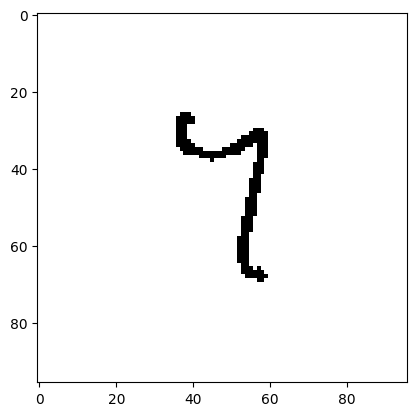

In [7]:
#from sklearn.model_selection import train_test_split
from torch.utils.data import random_split

# Browse the HOMUSV2 image files and create the dataset
root_dir = '/content/Homus_V2_imgs'

train_set = HomusDataset(root_dir=root_dir)
#print(train_set)
train_paths, val_paths, test_paths = random_split(train_set.paths, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42))
train_targets, val_targets, test_targets = random_split(train_set.targets, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42))

train_set = HomusDataset(root_dir=None, paths=train_paths, targets=train_targets)
val_set = HomusDataset(root_dir=None, paths=val_paths, targets=val_targets)
test_set = HomusDataset(root_dir=None, paths=test_paths, targets=test_targets)

print(len(train_set))
print(len(test_set))
print(len(val_set))

# create dictionary to convert the labels to integers
w2i_dict = {label: index for index, label in enumerate(set(train_set.targets))}
i2w_dict = {index: label for index, label in enumerate(set(train_set.targets))}

print(w2i_dict)
print(i2w_dict)

# Convert targets to integers:
train_set.targets = [w2i_dict[target] for target in train_set.targets]
test_set.targets = [w2i_dict[target] for target in test_set.targets]
val_set.targets = [w2i_dict[target] for target in val_set.targets]


# Displaying an example image from the files
test_img = cv2.imread(train_set[50][0])
plt.imshow(test_img, cmap='gray')

# See image size and label
print(test_img.shape)
print(train_set[50][1])


# Create Dataloaders
dl_batch = 32

train_loader = DataLoader(train_set, batch_size=dl_batch, shuffle=True,
                          collate_fn = train_set.homus_collate_fn, drop_last = True)
test_loader = DataLoader(test_set, batch_size=dl_batch, shuffle=True,
                         collate_fn = test_set.homus_collate_fn, drop_last = True)
val_loader = DataLoader(val_set, batch_size=dl_batch, shuffle=True,
                        collate_fn = val_set.homus_collate_fn, drop_last = True)

In [8]:
import time
from sklearn.metrics import accuracy_score
import copy

# See how a basic MLP performs on this to get a general idea of task difficulty
# as an homage to Yann LeCun
class HomusMLP(nn.Module):
    def __init__(
        self,
        input_size,
        hidden_size,
        num_layers,
        num_classes,
        use_dropout=False,
        ):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        if use_dropout:
            layers.append(nn.Dropout(0.2))
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
            if use_dropout:
                layers.append(nn.Dropout(0.2))
        self.hidden_layers = nn.Sequential(*layers)
        self.clf = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        return self.clf(self.hidden_layers(torch.reshape(x, (x.size(0), -1))))

# Training Loop

In [9]:
# training loop and eval


def train_model(model, criterion, optimizer, dataloaders, device, train_size,
                val_size, scheduler=None, num_epochs=50, print_epochs=True):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        if print_epochs:
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model.forward(inputs)
                    _, preds = torch.max(outputs, dim=1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                if scheduler:
                    scheduler.step()
            epoch_loss = running_loss / train_size if phase == 'train' else running_loss / val_size
            epoch_acc = running_corrects.double() / train_size if phase == 'train' else running_corrects.double() / val_size

            if print_epochs:
                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        #print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return accuracy_score(all_labels, all_preds)


# MLP Experiments

In [ ]:
import torch.optim
import torch.optim.lr_scheduler

# setup and start training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
dataloaders = {'train': train_loader, 'val': val_loader}
hidden_sizes = [128, 256, 512]
num_layers = [10, 20, 30]
for hidden_size in hidden_sizes:
    for num_layer in num_layers:
        print(f'Testing MLP with {num_layer} layers and {hidden_size} hidden')
        rand_img = cv2.imread(train_set[50][0])
        inputs = rand_img.shape[0]*rand_img.shape[1]*rand_img.shape[2]
        model = HomusMLP(inputs, hidden_size, num_layer, len(w2i_dict))
        model = model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
        #scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
        trained_model = train_model(model, criterion, optimizer, dataloaders, device,
                        len(train_set), len(val_set), scheduler=None, num_epochs=50,
                        print_epochs=False)
        acc = evaluate_model(trained_model, test_loader, device)
        print(f'Testing accuracy: {acc}')
        print(20*'-')

Testing MLP with 10 layers and 128 hidden
Training complete in 3m 27s
Best val Acc: 0.6855
Testing accuracy: 0.6741228070175439
--------------------
Testing MLP with 20 layers and 128 hidden
Training complete in 3m 55s
Best val Acc: 0.2162
Testing accuracy: 0.20482456140350877
--------------------
Testing MLP with 30 layers and 128 hidden
Training complete in 4m 28s
Best val Acc: 0.2224
Testing accuracy: 0.2131578947368421
--------------------
Testing MLP with 10 layers and 256 hidden
Training complete in 3m 45s
Best val Acc: 0.7044
Testing accuracy: 0.6960526315789474
--------------------
Testing MLP with 20 layers and 256 hidden
Training complete in 4m 20s
Best val Acc: 0.2189
Testing accuracy: 0.2179824561403509
--------------------
Testing MLP with 30 layers and 256 hidden
Training complete in 4m 55s
Best val Acc: 0.0570
Testing accuracy: 0.04956140350877193
--------------------
Testing MLP with 10 layers and 512 hidden
Training complete in 4m 30s
Best val Acc: 0.6925
Testing accur

# Custom CNN Experiment

In [10]:
# Since the MLP doesn't work great let's try a basic CNN:
import torch.nn as nn
import torch.nn.functional as F
import pdb

class HomusCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=96, stride=96)
        self.fc1 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        if x.size() != torch.Size([32, 3, 96, 96]):
            print(x.size())
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(dl_batch, -1)
        if x.size() != torch.Size([32, 256]):
            print(x.size())
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

In [98]:
import torch.optim
from torch.optim import lr_scheduler
import warnings
#warnings.filterwarnings("ignore")

# setup and start training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()

dataloaders = {'train': train_loader, 'val': val_loader}
model = HomusCNN(len(w2i_dict))
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.000003)
#optimizer = torch.optim.AdamW(model.parameters())
#scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=1.5)
trained_model = train_model(model, criterion, optimizer, dataloaders, device,
                len(train_set), len(val_set), scheduler=None, num_epochs=10,
                print_epochs=True)
acc = evaluate_model(trained_model, test_loader, device)
print(f'Testing accuracy: {acc}')
print(20*'-')

Epoch 0/9
----------
train Loss: 3.4605 Acc: 0.0262
val Loss: 3.4536 Acc: 0.0259
Epoch 1/9
----------
train Loss: 3.4604 Acc: 0.0419
val Loss: 3.4533 Acc: 0.0526
Epoch 2/9
----------
train Loss: 3.4597 Acc: 0.0523
val Loss: 3.4517 Acc: 0.0513
Epoch 3/9
----------
train Loss: 3.4543 Acc: 0.0528
val Loss: 3.4403 Acc: 0.0513
Epoch 4/9
----------
train Loss: 3.4456 Acc: 0.0529
val Loss: 3.4361 Acc: 0.0513
Epoch 5/9
----------
train Loss: 3.4440 Acc: 0.0523
val Loss: 3.4354 Acc: 0.0513
Epoch 6/9
----------
train Loss: 3.4437 Acc: 0.0497
val Loss: 3.4350 Acc: 0.0570
Epoch 7/9
----------
train Loss: 3.4435 Acc: 0.0507
val Loss: 3.4349 Acc: 0.0570
Epoch 8/9
----------
train Loss: 3.4432 Acc: 0.0529
val Loss: 3.4346 Acc: 0.0522
Epoch 9/9
----------
train Loss: 3.4430 Acc: 0.0513
val Loss: 3.4344 Acc: 0.0522
Training complete in 7m 33s
Best val Acc: 0.0570
Testing accuracy: 0.05017605633802817
--------------------


# Pretrained CNN Experiments (HOMUS)

In [11]:
# this model struggles to learn anything quickly so let's try
# with a pretrained googlenet now. We need to reshape the images
# to match the 224x224 input size
HomusImageGenerator.create_images(raw_data_directory="Homus_V2",
                                  destination_directory="Homus_V2_imgs_224",
                                  stroke_thicknesses=[3],
                                  canvas_width=224,
                                  canvas_height=224,
                                  staff_line_spacing=14,
                                  staff_line_vertical_offsets=None,
                                  random_position_on_canvas = False)

Generating 15200 images with 15200 symbols in 1 different stroke thicknesses ([3])
Randomly drawn on a fixed canvas of size 224x224 (Width x Height)
In directory /content/Homus_V2_imgs_224


100%|██████████| 15200/15200 [00:35<00:00, 425.05it/s]


{'2-4-Time/89-38_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e742710>,
 'Sixty-Four-Note/89-138_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608ec32230>,
 'C-Clef/89-3_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e742e30>,
 'Barline/89-149_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e913160>,
 'Half-Note/89-83_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e7426b0>,
 'Flat/89-56_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e910c40>,
 '12-8-Time/89-34_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e742d10>,
 'Whole-Note/89-70_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608ec324a0>,
 'C-Clef/89-4_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e742da0>,
 'G-Clef/89-12_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e7427a0>,
 'Sixty-Four-Note/89-140_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e743c70>,
 '3-8-Time/89-49_3.png': <omrdatasettools.Rectangle.Rectangle at 0x7f608e9124a0>,
 'Half-N

In [12]:
import torchvision.models as models
import warnings
warnings.filterwarnings("ignore")
# Browse the HOMUSV2 image files and create the dataset
root_dir = '/content/Homus_V2_imgs_224'

train_set = HomusDataset(root_dir=root_dir)
train_paths, val_paths, test_paths = random_split(train_set.paths, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42))
train_targets, val_targets, test_targets = random_split(train_set.targets, [0.7, 0.15, 0.15], generator=torch.Generator().manual_seed(42))

train_set = HomusDataset(root_dir=None, paths=train_paths, targets=train_targets)
val_set = HomusDataset(root_dir=None, paths=val_paths, targets=val_targets)
test_set = HomusDataset(root_dir=None, paths=test_paths, targets=test_targets)

train_set.targets = [w2i_dict[target] for target in train_set.targets]
test_set.targets = [w2i_dict[target] for target in test_set.targets]
val_set.targets = [w2i_dict[target] for target in val_set.targets]

dl_batch = 128

train_loader = DataLoader(train_set, batch_size=dl_batch, shuffle=True, collate_fn = train_set.homus_collate_fn)
test_loader = DataLoader(test_set, batch_size=dl_batch, shuffle=True, collate_fn = test_set.homus_collate_fn)
val_loader = DataLoader(val_set, batch_size=dl_batch, shuffle=True, collate_fn = val_set.homus_collate_fn)

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
criterion = nn.CrossEntropyLoss()
dataloaders = {'train': train_loader, 'val': val_loader}

pretrained = [models.efficientnet_b0(pretrained=True),
          models.resnet18(pretrained=True),
          models.googlenet(pretrained=True),
          models.convnext_tiny(pretrained=True),
          models.mobilenet_v3_small(pretrained=True)]
finetuned = []
names = ['EfficientNet-B0', 'ResNet18', 'GoogleNet', 'ConvNext-T', 'MobileNetV3']
i = 0
while pretrained != []:
    m = pretrained.pop(0)
    m.to(device)
    optimizer = torch.optim.AdamW(m.parameters())
    print(f'Training {names[i]}')
    finetuned.append(train_model(m, criterion, optimizer, dataloaders, device,
                            len(train_set), len(val_set), scheduler=None, num_epochs=10,
                            print_epochs=False))
    acc = evaluate_model(finetuned[i], test_loader, device)
    #m.to('cpu')
    del m
    torch.cuda.empty_cache()
    i += 1
    print(f'Testing accuracy: {acc}')
    print(20*'-')

del pretrained
torch.cuda.empty_cache()

#after this modles represents the saved finetuned weights. save them to some
#folder
for i, model in enumerate(finetuned):
    torch.save(model.state_dict(), f'{names[i]}_model.pth')

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 183MB/s]
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 93.6MB/s]
Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny-983f1562.pth
100%|██████████| 109M/109M [00:01<00:00, 100MB/s] 
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 118MB/s]


Training EfficientNet-B0
Training complete in 6m 11s
Best val Acc: 0.9355
Testing accuracy: 0.9355263157894737
--------------------
Training ResNet18
Training complete in 4m 51s
Best val Acc: 0.9456
Testing accuracy: 0.9486842105263158
--------------------
Training GoogleNet
Training complete in 5m 19s
Best val Acc: 0.9465
Testing accuracy: 0.95
--------------------
Training ConvNext-T
Training complete in 9m 35s
Best val Acc: 0.0575
Testing accuracy: 0.06140350877192982
--------------------
Training MobileNetV3
Training complete in 4m 26s
Best val Acc: 0.5842
Testing accuracy: 0.5833333333333334
--------------------


The above results from the MLP and CNN validate the literature results. That was just an exercise in re-implementation to get some preliminary data to compare to. The results show that the MLPs perform relatively poorly with accuracy topping out at around 70%. The custom CNN architecture does not learn anything likely due to hyperparameter issues but the pretrained architectures perform execeptionally well with 90%+ accuracites. There are obviously ways to improve these results with hyperparameter tuning etc but that is not the goal of this study. We want to now try to reach similar results for OMR on other models and datasets, notably on small transformer-based models.

Thus we will now explore pretrained transformers on this task and try to experiment with custom architectures as well. We will also try using another dataset.

# Transformer Experiments (HOMUS)

In [13]:
!pip install transformers==4.30

In [14]:
!pip install accelerate -U

  Using cached accelerate-0.29.3-py3-none-any.whl (297 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 k

In [15]:
!pip install datasets

In [21]:
from huggingface_hub import notebook_login

notebook_login()

In [31]:
# Swin transformer training:
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
from transformers import TrainingArguments, Trainer
from transformers import AutoFeatureExtractor, ViTForImageClassification
from transformers import DeiTModel
from transformers import AutoImageProcessor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from datasets import load_metric

acc = load_metric("accuracy")
prec = load_metric("precision")
rec = load_metric("recall")
f1 = load_metric("f1")
model_checkpoint = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model from which to fine-tune
model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=w2i_dict,
    id2label=i2w_dict,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-HOMUS",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    a = acc.compute(predictions=predictions, references=eval_pred.label_ids)
    p = prec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    r = rec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    f = f1.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    return {
        "accuracy": a['accuracy'],
        "precision": p['precision'],
        "recall": r['recall'],
        "f1_score": f['f1']
    }
image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)


def hf_homus_collate_fn(batch):
    images = []
    targets = []
    for path, target in batch:
        image = cv2.imread(path)/255.0
        image = np.transpose(image, (2, 0, 1))
        images.append(image)
        targets.append(target)
    images = torch.tensor(np.array(images), dtype=torch.float32)
    targets = torch.tensor(np.array(targets), dtype=torch.long)
    return {'pixel_values': images, 'labels': targets}



trainer = Trainer(
    model,
    args,
    train_dataset=train_set,
    eval_dataset=val_set,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=hf_homus_collate_fn,
)

train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([32]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([32, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/content/swin-tiny-patch4-window7-224-finetuned-HOMUS is already a clone of https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-HOMUS. Make sure you pull the latest changes with `repo.git_pull()`.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
0,1.249900,0.846093,0.712719,0.738500,0.712719,0.697345
1,0.381600,0.313360,0.883772,0.892312,0.883772,0.880157
2,0.247400,0.227408,0.918421,0.924673,0.918421,0.917551
4,0.127600,0.228070,0.919737,0.925456,0.919737,0.919354
4,0.093300,0.191557,0.936404,0.940685,0.936404,0.936080
5,0.062900,0.179597,0.944298,0.946598,0.944298,0.944058
6,0.054000,0.170147,0.946491,0.946592,0.946491,0.946151
8,0.022800,0.165183,0.948246,0.948398,0.948246,0.947967
8,0.029700,0.151755,0.954825,0.955219,0.954825,0.954716
9,0.022100,0.153860,0.956140,0.956488,0.956140,0.956058


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/105M [00:00<?, ?B/s]

Upload file runs/Apr29_06-58-09_2f7318eb7136/events.out.tfevents.1714373892.2f7318eb7136.11404.10:   0%|      …

To https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-HOMUS
   d949a74..7737059  main -> main

   d949a74..7737059  main -> main

To https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-HOMUS
   7737059..af58803  main -> main

   7737059..af58803  main -> main



***** train metrics *****
  epoch                    =         9.97
  total_flos               = 2458069131GF
  train_loss               =       0.4035
  train_runtime            =   0:26:42.64
  train_samples_per_second =        66.39
  train_steps_per_second   =        0.518


In [32]:
# DeIT transformer training:
model_checkpoint = "facebook/deit-small-patch16-224" # pre-trained model from which to fine-tune
model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=w2i_dict,
    id2label=i2w_dict,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-HOMUS",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)

trainer = Trainer(
    model,
    args,
    train_dataset=train_set,
    eval_dataset=val_set,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=hf_homus_collate_fn,
)

train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/88.3M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/deit-small-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([32, 384]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([32]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Cloning https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-HOMUS into local empty directory.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
0,0.847500,0.663817,0.822368,0.830439,0.822368,0.820596
1,0.260000,0.332427,0.891667,0.899594,0.891667,0.890905
2,0.134000,0.234235,0.927193,0.929158,0.927193,0.926487
4,0.080700,0.215322,0.930702,0.931356,0.930702,0.930097
4,0.032200,0.207713,0.936404,0.938288,0.936404,0.936369
5,0.016200,0.225476,0.937719,0.938932,0.937719,0.937693
6,0.009500,0.214667,0.943860,0.944592,0.943860,0.943858
8,0.002200,0.218529,0.950000,0.951200,0.950000,0.950013
8,0.001700,0.211699,0.950439,0.950898,0.950439,0.950369
9,0.001500,0.212964,0.950439,0.950898,0.950439,0.950369


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/82.8M [00:00<?, ?B/s]

Upload file runs/Apr29_07-25-46_2f7318eb7136/events.out.tfevents.1714375551.2f7318eb7136.11404.11:   0%|      …

To https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-HOMUS
   b85ae53..a130682  main -> main

   b85ae53..a130682  main -> main

To https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-HOMUS
   a130682..a61d3ab  main -> main

   a130682..a61d3ab  main -> main



***** train metrics *****
  epoch                    =         9.97
  total_flos               = 1934579466GF
  train_loss               =        0.295
  train_runtime            =   0:21:45.33
  train_samples_per_second =       81.512
  train_steps_per_second   =        0.636


# Transformer Experiments (MUSCIMA++)

In [13]:
# Since the HOMUS dataset is essentially solved by the CNNs, we will now try
# working with the MUSCIMA++ dataset on Transformer-based models.

Downloader().download_and_extract_dataset(OmrDataset.MuscimaPlusPlus_V2, "MUSCIMA++V2")

Downloading: https://github.com/OMR-Research/muscima-pp/releases/download/v2.0/MUSCIMA-pp_v2.0.zip Bytes: 11080517 into MUSCIMA-pp_v2.0.zip



Extracting MUSCIMA-pp_v2.0.zip dataset...


Downloading: https://github.com/apacha/OMR-Datasets/releases/download/datasets/CVC_MUSCIMA_PP_Annotated-Images.zip Bytes: 8038367 into CVC_MUSCIMA_PP_Annotated-Images.zip


Deleting temporary directory MuscimaPpImages


In [14]:
from omrdatasettools import MuscimaPlusPlusSymbolImageGenerator
a = MuscimaPlusPlusSymbolImageGenerator()
a.extract_and_render_all_symbol_masks('/content/MUSCIMA++V2/', '/content/MV2/')

Extracting Symbols from MUSCIMA++ Dataset...


Loading nodes from xml-files: 100%|██████████| 140/140 [00:23<00:00,  6.08it/s]


Loaded 102914 nodes


Generating images from node masks: 100%|██████████| 102914/102914 [00:42<00:00, 2438.43it/s]


In [15]:
# Create new dataset class for MUSCIMA
import torchvision.transforms as transforms

class MSCDataset(Dataset):
    def __init__(self, root_dir=None, paths=None, targets=None):
        #initialize it with optional arguments: either root dir or data.
        if root_dir:
            targets = []
            paths = []
            for dirpath, dirnames, filenames in os.walk(root_dir):
                if filenames != []:
                    target = dirpath.split('/')[-1]
                    if target == 'characterCapitalE' or target == 'characterCapitalC' \
                    or target == 'characterCapitalS' or target == 'transpositionText':
                        continue
                    for file in filenames:
                        paths.append(os.path.join(dirpath,file))
                        targets.append(target)
            self.paths = paths
            self.targets = targets
            #self.targets = torch.tensor(targets, dtype=torch.long)
            return
        if paths and targets:
            self.paths = paths
            self.targets = targets
            return

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        return self.paths[idx], self.targets[idx]

    def msc_collate_fn(self, batch):
        images = []
        targets = []
        transform = transforms.Resize((224, 224))
        for path, target in batch:
            image = cv2.imread(path)/255.0
            image = np.transpose(image, (2, 0, 1))
            #print(image.shape)
            image = torch.tensor(image)
            image = transform(image)
            #print(image.size())
            images.append(image)
            targets.append(target)
        images = torch.tensor(np.array(images), dtype=torch.float32)
        targets = torch.tensor(np.array(targets), dtype=torch.long)
        return images, targets

{'barline': 0, 'characterSmallP': 1, 'characterSmallD': 2, 'volta': 3, 'noteheadFull': 4, 'articulationStaccato': 5, 'accidentalDoubleSharp': 6, 'instrumentSpecific': 7, 'characterCapitalT': 8, 'gClef': 9, 'rest8th': 10, 'articulationAccent': 11, 'arpeggio': 12, 'characterSmallX': 13, 'restHalf': 14, 'restQuarter': 15, 'repeat1Bar': 16, 'articulationTenuto': 17, 'numeral5': 18, 'noteheadHalf': 19, 'characterSmallR': 20, 'glissando': 21, 'staff': 22, 'accidentalNatural': 23, 'beam': 24, 'characterCapitalV': 25, 'characterSmallS': 26, 'numeral0': 27, 'characterSmallC': 28, 'fClef': 29, 'augmentationDot': 30, 'repeatDot': 31, 'characterDot': 32, 'tie': 33, 'breathMark': 34, 'accidentalSharp': 35, 'numeral6': 36, 'timeSigCommon': 37, 'characterCapitalR': 38, 'wiggleTrill': 39, 'characterCapitalF': 40, 'characterSmallM': 41, 'bracket': 42, 'otherNumericSign': 43, 'tupleBracket': 44, 'characterSmallF': 45, 'staffSpace': 46, 'numeral2': 47, 'dynamicLetterS': 48, 'characterSmallA': 49, 'numera

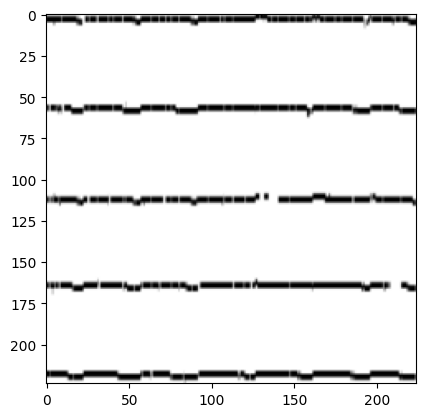

In [16]:
from sklearn.model_selection import train_test_split

root_dir = '/content/MV2'
train_set = MSCDataset(root_dir=root_dir)

# Create dictionary to convert the labels to integers
w2i_dict = {label: index for index, label in enumerate(set(train_set.targets))}
i2w_dict = {index: label for index, label in enumerate(set(train_set.targets))}
print(w2i_dict)

train_set.targets = [w2i_dict[target] for target in train_set.targets]

values, counts = np.unique(train_set.targets, return_counts = True)
# This is a very imbalanced dataset as can be seen below which is tougher.
print(values)
print(counts)

# Classes that have 3 or less entries were removed in the MSCDataset class
# so that we can split the dataset without error:

# Split and stratify the dataset to ensure all labels are present
# ignore test set for these purposes and just split into train test
x_train, x_val, y_train, y_val = train_test_split(train_set.paths, train_set.targets, test_size=0.3, stratify=train_set.targets, random_state=41)

train_set = MSCDataset(root_dir=None, paths=x_train, targets=y_train)
val_set = MSCDataset(root_dir=None, paths=x_val, targets=y_val)

# Displaying an example image from the files
test_img = cv2.imread(train_set[55][0])
plt.imshow(test_img, cmap='gray')

# This is now homogeneous!

# See image size and label
print(test_img.shape)
print(train_set[50][1])

# Create Dataloaders
dl_batch = 32
train_loader = DataLoader(train_set, batch_size=dl_batch, shuffle=True,
                          collate_fn = train_set.msc_collate_fn, drop_last = True)
val_loader = DataLoader(val_set, batch_size=dl_batch, shuffle=True,
                        collate_fn = val_set.msc_collate_fn, drop_last = True)

img, _ = next(iter(train_loader))
plt.imshow(np.transpose(img[0], (1, 2, 0)))

In [2]:
!pip install transformers==4.30

  Using cached transformers-4.30.0-py3-none-any.whl (7.2 MB)


In [29]:
# Swin transformer training:
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
from transformers import TrainingArguments, Trainer
from transformers import AutoFeatureExtractor, ViTForImageClassification
from transformers import DeiTModel
from transformers import AutoImageProcessor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from datasets import load_metric
acc = load_metric("accuracy")
prec = load_metric("precision")
rec = load_metric("recall")
f1 = load_metric("f1")
model_checkpoint = "microsoft/swin-tiny-patch4-window7-224" # pre-trained model from which to fine-tune
model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=w2i_dict,
    id2label=i2w_dict,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-MUSCIMApp",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    a = acc.compute(predictions=predictions, references=eval_pred.label_ids)
    p = prec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    r = rec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    f = f1.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    return {
        "accuracy": a['accuracy'],
        "precision": p['precision'],
        "recall": r['recall'],
        "f1_score": f['f1']
    }
image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)


def hf_msc_collate_fn(batch):
    images = []
    targets = []
    transform = transforms.Resize((224, 224))
    for path, target in batch:
        image = cv2.imread(path)/255.0
        image = np.transpose(image, (2, 0, 1))
        #print(image.shape)
        image = torch.tensor(image)
        image = transform(image)
        #print(image.size())
        images.append(image)
        targets.append(target)
    images = torch.tensor(np.array(images), dtype=torch.float32)
    targets = torch.tensor(np.array(targets), dtype=torch.long)
    return {'pixel_values': images, 'labels': targets}


trainer = Trainer(
    model,
    args,
    train_dataset=train_set,
    eval_dataset=val_set,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=hf_msc_collate_fn,
)

train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([111]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([111, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/content/swin-tiny-patch4-window7-224-finetuned-MUSCIMApp is already a clone of https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-MUSCIMApp. Make sure you pull the latest changes with `repo.git_pull()`.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
1,0.398700,0.416939,0.852460,0.835284,0.852460,0.828556
2,0.333300,0.338305,0.869465,0.863000,0.869465,0.854449


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/106M [00:00<?, ?B/s]

Upload file runs/Apr29_18-17-45_2a73f8d146ee/events.out.tfevents.1714414668.2a73f8d146ee.7809.5:   0%|        …

To https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-MUSCIMApp
   a746c2e..f9dfeae  main -> main

   a746c2e..f9dfeae  main -> main

To https://huggingface.co/nadimkanazi/swin-tiny-patch4-window7-224-finetuned-MUSCIMApp
   f9dfeae..62b4da0  main -> main

   f9dfeae..62b4da0  main -> main



***** train metrics *****
  epoch                    =          2.0
  total_flos               = 3345179566GF
  train_loss               =       0.6236
  train_runtime            =   0:37:11.07
  train_samples_per_second =       64.573
  train_steps_per_second   =        0.505


In [30]:
# Swin transformer training:
from transformers import DeiTForImageClassification, DeiTFeatureExtractor
from transformers import TrainingArguments, Trainer
from transformers import AutoFeatureExtractor, ViTForImageClassification
from transformers import DeiTModel
from transformers import AutoImageProcessor
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from datasets import load_metric
acc = load_metric("accuracy")
prec = load_metric("precision")
rec = load_metric("recall")
f1 = load_metric("f1")
model_checkpoint = "facebook/deit-small-patch16-224" # pre-trained model from which to fine-tune
model = AutoModelForImageClassification.from_pretrained(
    model_checkpoint,
    label2id=w2i_dict,
    id2label=i2w_dict,
    ignore_mismatched_sizes = True, # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)
model_name = model_checkpoint.split("/")[-1]

args = TrainingArguments(
    f"{model_name}-finetuned-MUSCIMApp",
    remove_unused_columns=False,
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    a = acc.compute(predictions=predictions, references=eval_pred.label_ids)
    p = prec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    r = rec.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    f = f1.compute(predictions=predictions, references=eval_pred.label_ids, average='weighted')
    return {
        "accuracy": a['accuracy'],
        "precision": p['precision'],
        "recall": r['recall'],
        "f1_score": f['f1']
    }
image_processor  = AutoImageProcessor.from_pretrained(model_checkpoint)


def hf_msc_collate_fn(batch):
    images = []
    targets = []
    transform = transforms.Resize((224, 224))
    for path, target in batch:
        image = cv2.imread(path)/255.0
        image = np.transpose(image, (2, 0, 1))
        #print(image.shape)
        image = torch.tensor(image)
        image = transform(image)
        #print(image.size())
        images.append(image)
        targets.append(target)
    images = torch.tensor(np.array(images), dtype=torch.float32)
    targets = torch.tensor(np.array(targets), dtype=torch.long)
    return {'pixel_values': images, 'labels': targets}


trainer = Trainer(
    model,
    args,
    train_dataset=train_set,
    eval_dataset=val_set,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=hf_msc_collate_fn,
)

train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/88.3M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/deit-small-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 384]) in the checkpoint and torch.Size([111, 384]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([111]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Cloning https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-MUSCIMApp into local empty directory.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1 Score
1,0.372300,0.391470,0.864574,0.851249,0.864574,0.845265
2,0.314700,0.338432,0.874324,0.867455,0.874324,0.858427


Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 1.00/82.9M [00:00<?, ?B/s]

Upload file runs/Apr29_18-56-06_2a73f8d146ee/events.out.tfevents.1714416971.2a73f8d146ee.7809.6:   0%|        …

To https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-MUSCIMApp
   2dcb4e8..8005497  main -> main

   2dcb4e8..8005497  main -> main

To https://huggingface.co/nadimkanazi/deit-small-patch16-224-finetuned-MUSCIMApp
   8005497..e2b029f  main -> main

   8005497..e2b029f  main -> main



***** train metrics *****
  epoch                    =          2.0
  total_flos               = 2630655596GF
  train_loss               =       0.5944
  train_runtime            =   0:30:07.76
  train_samples_per_second =       79.694
  train_steps_per_second   =        0.623


# MLP and Pretrained CNN Experiments (MUSCIMA++)

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
criterion = nn.CrossEntropyLoss()
dataloaders = {'train': train_loader, 'val': val_loader}

pretrained = [models.efficientnet_b0(pretrained=True),
          models.resnet18(pretrained=True),
          models.googlenet(pretrained=True),
          models.convnext_tiny(pretrained=True),
          models.mobilenet_v3_small(pretrained=True)]
finetuned = []
names = ['EfficientNet-B0', 'ResNet18', 'GoogleNet', 'ConvNext-T', 'MobileNetV3']
i = 0
while pretrained != []:
    m = pretrained.pop(0)
    m.to(device)
    optimizer = torch.optim.AdamW(m.parameters())
    print(f'Training {names[i]}')
    trained_model = train_model(m, criterion, optimizer, dataloaders, device,
                            len(train_set), len(val_set), scheduler=None, num_epochs=2,
                            print_epochs=False)
    finetuned.append(trained_model)
    acc = evaluate_model(finetuned[i], test_loader, device)
    #m.to('cpu')
    del m
    torch.cuda.empty_cache()
    i += 1
    print(f'Testing accuracy: {acc}')
    print(20*'-')

del pretrained
torch.cuda.empty_cache()

#after this modles represents the saved finetuned weights. save them to some
#folder
for i, model in enumerate(finetuned):
    torch.save(model.state_dict(), f'{names[i]}_model.pth')

Training EfficientNet-B0
Training complete in 10m 46s
Best val Acc: 0.8613
Testing accuracy: 0.0013157894736842105
--------------------
Training ResNet18
Training complete in 6m 42s
Best val Acc: 0.8553
Testing accuracy: 0.037719298245614034
--------------------
Training GoogleNet
Training complete in 7m 54s
Best val Acc: 0.8569
Testing accuracy: 0.04736842105263158
--------------------
Training ConvNext-T
Training complete in 26m 43s
Best val Acc: 0.8478
Testing accuracy: 0.05394736842105263
--------------------
Training MobileNetV3
Training complete in 5m 36s
Best val Acc: 0.8540
Testing accuracy: 0.05043859649122807
--------------------


In [17]:
import torch.optim
import torch.optim.lr_scheduler

# setup and start training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
dataloaders = {'train': train_loader, 'val': val_loader}
hidden_sizes = [128, 256, 512]
num_layers = [10, 20, 30]
for hidden_size in hidden_sizes:
    for num_layer in num_layers:
        print(f'Testing MLP with {num_layer} layers and {hidden_size} hidden')
        rand_img = cv2.imread(train_set[50][0])
        inputs = rand_img.shape[0]*rand_img.shape[1]*rand_img.shape[2]
        model = HomusMLP(inputs, hidden_size, num_layer, len(w2i_dict))
        model = model.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
        #scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
        trained_model = train_model(model, criterion, optimizer, dataloaders, device,
                        len(train_set), len(val_set), scheduler=None, num_epochs=50,
                        print_epochs=False)
        acc = evaluate_model(trained_model, test_loader, device)
        print(f'Testing accuracy: {acc}')
        print(20*'-')

Testing MLP with 10 layers and 128 hidden


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x150528 and 2808x128)